# **Perceptron Implementation on the Iris Dataset**

### **Project Overview**

This project demonstrates the manual implementation of the **Perceptron learning algorithm** and its application to a binary classification problem using the **Iris dataset**. The project was conducted as part of the Computer Workshop course, using Python in a google colab environment.

### **What is the Perceptron Algorithm?**
The Perceptron algorithm is one of the simplest and most fundamental supervised
learning algorithms used for binary classification. It was introduced by Frank Rosenblatt in 1958 and is considered a building block for modern neural networks.

**Key Concepts:**


* The Perceptron is a linear classifier that tries to find a hyperplane that separates two classes of data.

* It updates its weights based on misclassified examples during training.

* The model makes predictions by computing the weighted sum of the input features plus a bias, and then applying the sign function to determine the output class (+1 or -1).




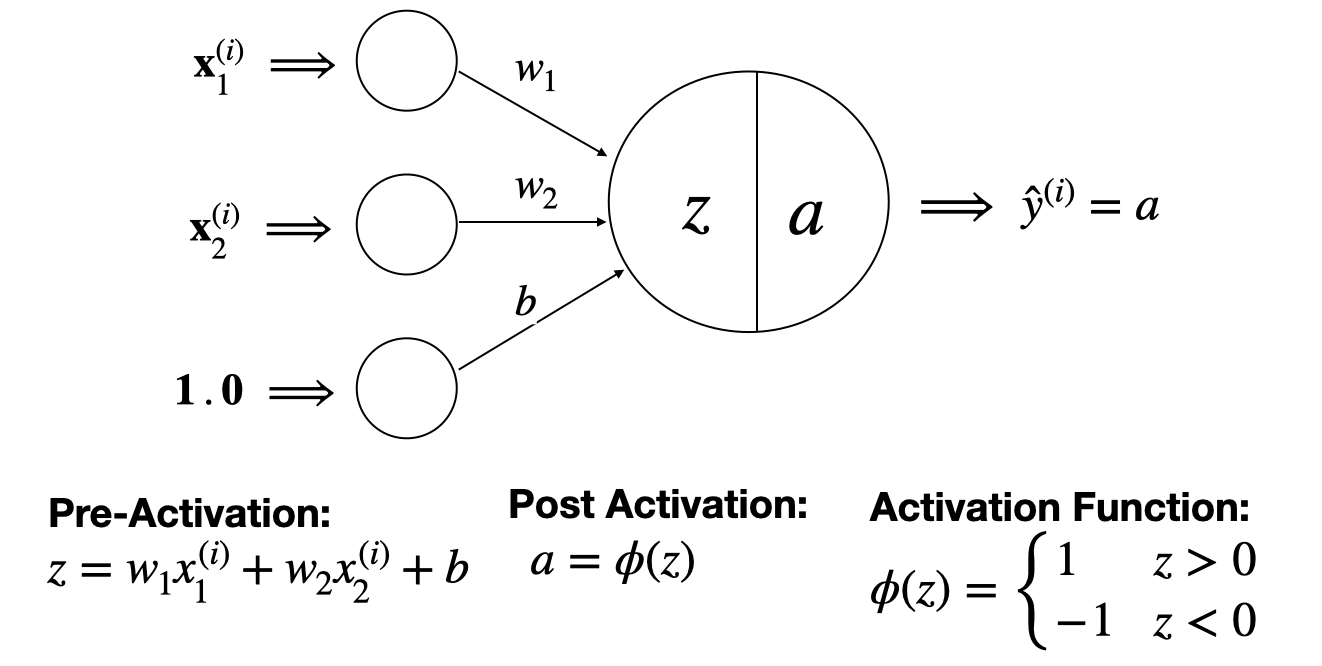

### **Dataset Summary**
The Iris dataset is a well-known dataset used for classification tasks in machine learning. It contains 150 samples of iris flowers, each belonging to one of three species :

* Setosa

* Versicolor

* Virginica

Each sample includes four numerical features :  
*sepal length*, *sepal width*, *petal length*, and *petal width*.


The dataset is loaded using pandas:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
# from sklearn.datasets import load_iris

sns.set_theme()

# df = load_iris()

df = pd.read_csv("/content/iris_dataset.csv")

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### **Dataset Slicing**
The Perceptron is used on binary classification problems. Thus, we need to choose two of the three species of iris flower to implement and train the perceptron on :

* Setosa
* Virginica

The selected features for training the model are:

*sepal length*, *sepal width*

In [ ]:
df.iloc[list(range(0, 50)) + list(range(100, 150))]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### **Data Preprocessing**

A subset containing only the Setosa and Virginica samples is extracted (100 samples in total).

The target labels are transformed into numerical values:
* Setosa → labeled as +1
* Virginica → labeled as -1

The input features are stored as a NumPy array X, and the target values as y.

In [ ]:
y = df.iloc[list(range(0, 50)) + list(range(100, 150))].species.values

y = np.where(y == 'setosa', 1, -1)

X = df[["sepal_length", "sepal_width"]].iloc[list(range(0, 50)) + list(range(100, 150))].values

### **Perceptron Model**
A custom Perceptron class was implemented with the following components:

Initialization of learning rate and number of epochs

Weight vector and bias initialization using random values

**Training method that:**

* Iteratively updates weights using the Perceptron learning rule

* Records the number of misclassifications per epoch

* Prediction function based on the sign of the weighted input

**Hyperparameters:**

* Learning rate (eta): 0.3

* Number of epochs: 50

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.3, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])  # weights + bias
        self.errors_ = []

        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[:-1] += update * xi
                self.w_[-1] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            if errors == 0:
                break

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### **Model Training and Evaluation**
The model was trained on the preprocessed data. The number of misclassified samples in each epoch was recorded and plotted to analyze the learning progress of the algorithm.

In [ ]:
clf = Perceptron(epochs = 100_000)

clf.train(X, y)

In [ ]:
y_hat = clf.predict(X)

print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


### **Plotting**
A decision boundary was visualized using the `mlxtend.plotting.plot_decision_regions` utility to show how the Perceptron separates the two classes in the feature space.

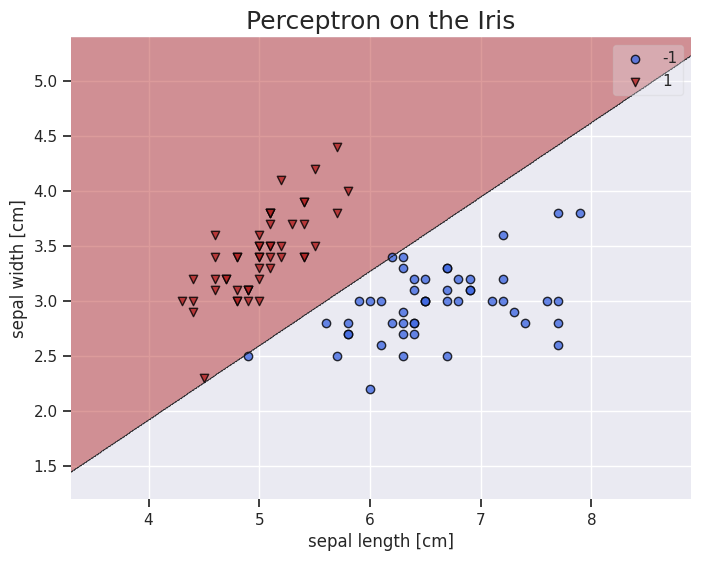

In [ ]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X, y, clf=clf, colors='royalblue,firebrick', markers='ov')
plt.title("Perceptron on the Iris", fontsize = 18)
plt.xlabel("sepal length [cm]", fontsize = 12)
plt.ylabel("sepal width [cm]", fontsize = 12)

plt.show()

The plot below illustrates the  Number of Misclassifications per Epoch during the Perceptron training.

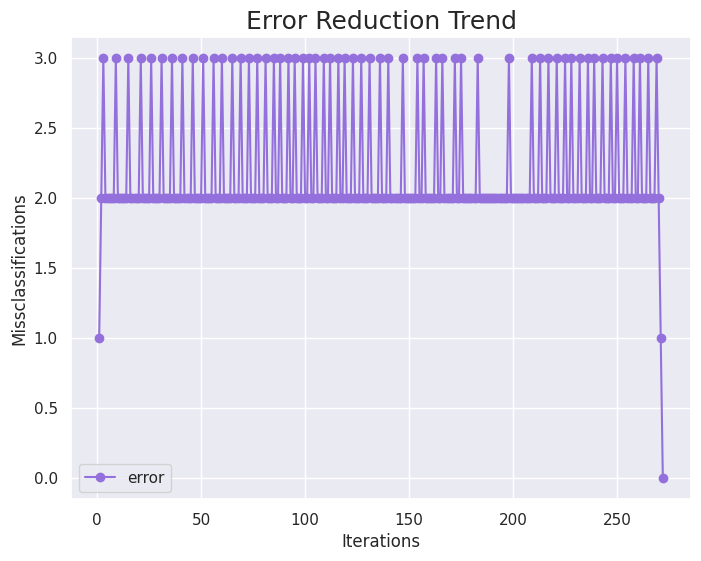

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_,
         marker = "o",
         label = "error",
         color='mediumpurple', )
plt.title("Error Reduction Trend", fontsize = 18)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()

plt.show()

### **Results**
* The Perceptron was able to converge successfully on the binary classification task.

* The misclassification plot showed a decrease over time, indicating the learning process.

* The decision boundary clearly demonstrated the linear separability between Setosa and Virginica using sepal features.

### **Conclusion**
This project successfully demonstrated the fundamentals of:

* Binary classification using a linear model

* Implementation of the Perceptron algorithm from scratch

* The importance of feature selection and data preprocessing

* Visualization of classification boundaries and training performance

* The hands-on approach provided valuable insight into the inner workings of one of the earliest machine learning algorithms.